# AI Community @ Семинар  №3
## Домашнее задание 2
### Базовое решение конкурса

In [68]:
import pandas as pd
import numpy as np

from sklearn import linear_model

In [69]:
# Считаем данные
train = pd.read_csv('data/data-train.csv', parse_dates=['Timestamp'])
test = pd.read_csv('data/data-test.csv', parse_dates=['Timestamp'])

In [166]:
train.head(3)

,ID,Timestamp,Location,Category
0,152187,2016-03-30 12:18:52.537,8,0
1,322276,2016-09-07 17:43:37.960,6,1
2,306252,2016-08-28 09:41:10.850,1,1


In [167]:
test.head(3)

,ID,Location,Timestamp
0,662032,6,2017-08-25 12:02:07.603
1,527522,6,2017-03-11 08:39:41.213
2,443572,6,2016-12-11 13:30:50.660


In [281]:
# Вычленим признаки
train_dayofweek = train.Timestamp.dt.dayofweek
train_early = train.Timestamp.dt.hour < 12
train_weekofyear = train.Timestamp.dt.weekofyear
train_month = train.Timestamp.dt.month < 8
# train_year = train.Timestamp.dt.year
train_loc = train.Location == 8

In [282]:
###
test_dayofweek = test.Timestamp.dt.dayofweek
test_early = test.Timestamp.dt.hour < 12
test_weekofyear = test.Timestamp.dt.weekofyear
test_month = test.Timestamp.dt.month < 8
# test_year = test.Timestamp.dt.year
test_loc = test.Location == 8

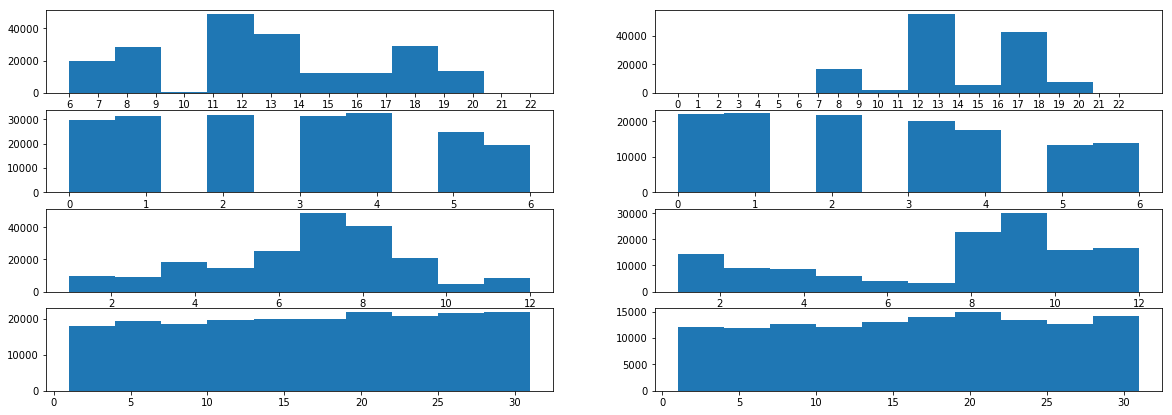

In [283]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 2, figsize=(20,7))
plt.setp([ax[0]], xticks=range(0, 23, 1))
#
c0 = train[train.Category == 0]
c1 = train[train.Category == 1]
#
ax[0][0].hist(c0.Timestamp.dt.hour)
ax[0][1].hist(c1.Timestamp.dt.hour)
ax[1][0].hist(c0.Timestamp.dt.dayofweek)
ax[1][1].hist(c1.Timestamp.dt.dayofweek)
ax[2][0].hist(c0.Timestamp.dt.month)
ax[2][1].hist(c1.Timestamp.dt.month)
ax[3][0].hist(c0.Timestamp.dt.day)
ax[3][1].hist(c1.Timestamp.dt.day)
plt.show()

In [284]:
train_features = pd.DataFrame({
    'dow': train_dayofweek,
    'month' : train_month,
    'early': train_early,
    'loc': train_loc,
    'weekofyear': train_weekofyear
})

test_features = pd.DataFrame({
    'dow': test_dayofweek,
    'month' : test_month,
    'early': test_early,
    'loc': test_loc,
    'weekofyear': test_weekofyear
})

In [287]:
# Обучим линейную регрессию
clf = linear_model.LogisticRegression()

clf.fit(train_features, train.Category)
regression_result = clf.predict(test_features)
train_test_result = clf.predict(train_features)
predicted_categories = (regression_result > np.median(regression_result)).astype(int)

In [291]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pred_test = (train_test_result > np.median(train_test_result))
print(accuracy_score(pred_test, train.Category))

print('Cross-validation (accuracy)', cross_val_score(clf, train_features, train.Category, cv=3))

0.745033700694
Cross-validation (accuracy) [ 0.74346841  0.74487262  0.74599247]


In [289]:
# Сохраниим предсказания
pd.DataFrame({
    'id': test.ID,
    'category': predicted_categories
}).to_csv('submission.csv', index=False)